In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [5]:
data = 'F:/SNS/Life-Expectancy-Prediction-master/Life Expectancy/Data/Life Expectancy Data.csv'
life = pd.read_csv(data)

life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
life.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

Converting the state of national development from string to 0 and 1

In [6]:
status_map = {'Developed': 1, 'Developing': 0}
life['Status_int'] = life['Status'].map(status_map)
print(life)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01    

Handling of null values

In [42]:
life.isna()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_int
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
# the date of Nan
life.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Status_int                           0
dtype: int64

In [35]:
# It would be too arbitrary to first remove all rows with null values present.
# Null values can be removed at the end of the data analysis by selecting the columns that need to be used
# Missing values can also be dealt with by padding

#fill gap forward
#data.fillna(method="pad")
#fill gap backward
#data.fillna(method="bfill")

print('Old size: %d' % len(life))
# The value we want to predict is the life span, so we have to remove the null from the life span column no matter what we do
# The other thing is to remove the nulls from the column one by one so as not to affect the interpolation of the data later
# df_remove_alcohol is the data after removing the null value from the Alcohol column
df_remove_alcohol = life.dropna(how = 'any', axis = 0,subset=['Alcohol','Life expectancy '])
print('New size: %d' % len(df_remove_alcohol))
df = df_remove_alcohol.drop('Hepatitis B', axis=1)
#print(df.head())
df.isnull().sum()
#df_remove_hepatitisB = life.dropna(how = 'any', axis = 0,subset=['Hepatitis B','Life expectancy '])
#print('New size: %d' % len(df_remove_hepatitisB))
#df_remove_lifeexpectancy = life.dropna(how = 'any', axis = 0,subset=['Life expectancy '])
#df_remove_lifeexpectancy.isnull().sum()

Old size: 2938
New size: 2735
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Measles    BMI   ...  \
0             62     0.01               71.279624      1154   19.1  ...   
1             64     0.01               73.523582       492   18.6  ...   
2             66     0.01               73.219243       430   18.1  ...   
3             69     0.01               78.184215      2787   17.6  ...   
4             71     0.01                7.097109      3013   17.2  ...   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Measles                              0
 BMI                                15
under-five deaths                    0
Polio                                7
Total expenditure                   37
Diphtheria                           7
 HIV/AIDS                            0
GDP                                407
Population                         606
 thinness  1-19 years               15
 thinness 5-9 years                 15
Income composition of resources    151
Schooling                          151
Status_int                           0
dtype: int64

In [16]:
#df_remove_alcohol.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        530
Measles                              0
 BMI                                15
under-five deaths                    0
Polio                                7
Total expenditure                   37
Diphtheria                           7
 HIV/AIDS                            0
GDP                                407
Population                         606
 thinness  1-19 years               15
 thinness 5-9 years                 15
Income composition of resources    151
Schooling                          151
dtype: int64

In [17]:
#df_remove_hepatitisB.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            170
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                12
under-five deaths                    0
Polio                                0
Total expenditure                  189
Diphtheria                           0
 HIV/AIDS                            0
GDP                                366
Population                         573
 thinness  1-19 years               12
 thinness 5-9 years                 12
Income composition of resources    116
Schooling                          116
dtype: int64

Handling of outliers, data interpolation

To summarise the analysis of the 3σ criterion in roughly the following steps:

First you need to ensure that the data column to be tested follows a roughly normal distribution.
Then calculate the standard deviation of the data column to be tested.
Finally, compare each value in the data column, whether it is greater than three times the standard deviation.
Choose to present this in a visual way。

Alcohol p值为 0.0不是正态分布


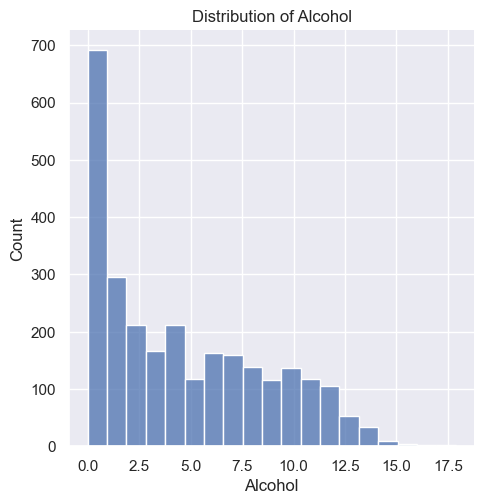

In [36]:

#Draw a graph to visualise the distribution of the data
def distribution_data(data_series,name):
    sns.set_theme()
    sns.displot(data=data_series).set(title=f"Distribution of {name}", xlabel=name)

# Detecting normality with K-S
def kstesting_normality(data_series,name):
    p = stats.kstest(data_series, 'norm')
    if p.pvalue > 0.05:
        print(f'{name} p is {p.pvalue} is normally distributed')
    else:
        print(f'{name} p is {p.pvalue} is not normally distributed')
#Checking the normality of Alcohol
distribution_data(df.Alcohol,"Alcohol")
kstesting_normality(df.Alcohol,"Alcohol")

HepatitisB p值为 0.0不是正态分布


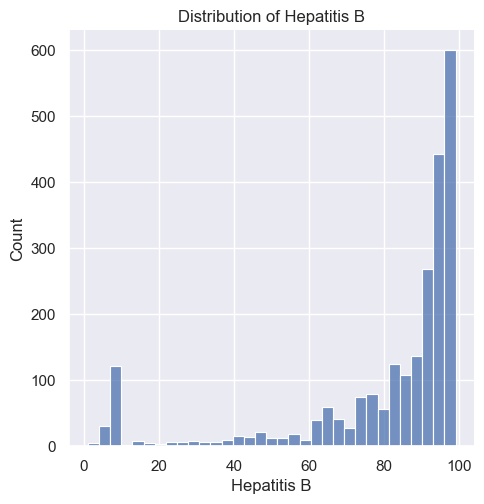

In [46]:

#Test whether Hepatitis B conforms to a normal distribution
#distribution_data(df_remove_hepatitisB['Hepatitis B'],"Hepatitis B")
#kstesting_normality(df_remove_hepatitisB['Hepatitis B'],"HepatitisB")

Life expectancy  p值为 0.0不是正态分布


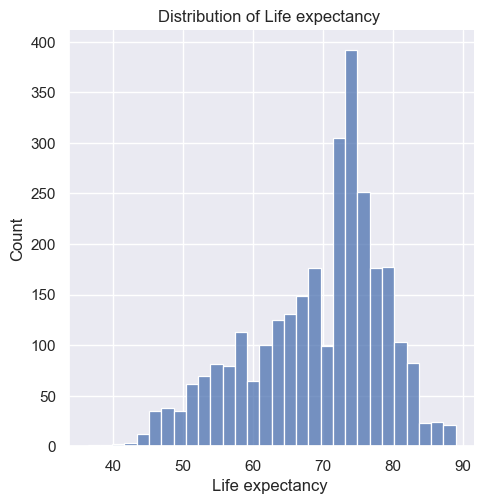

In [48]:
#Test whether life expectancy conforms to a normal distribution
distribution_data(df['Life expectancy '],"Life expectancy ")
kstesting_normality(df['Life expectancy '],"Life expectancy ")

Adult Mortality p值为 0.0不是正态分布


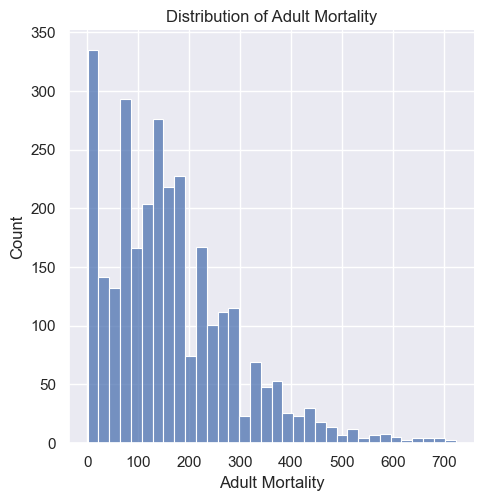

In [49]:
#Test whether Adult Mortality conforms to a normal distribution
distribution_data(df['Adult Mortality'],"Adult Mortality")
kstesting_normality(df['Adult Mortality'],"Adult Mortality")

infant deaths p值为 0.0不是正态分布


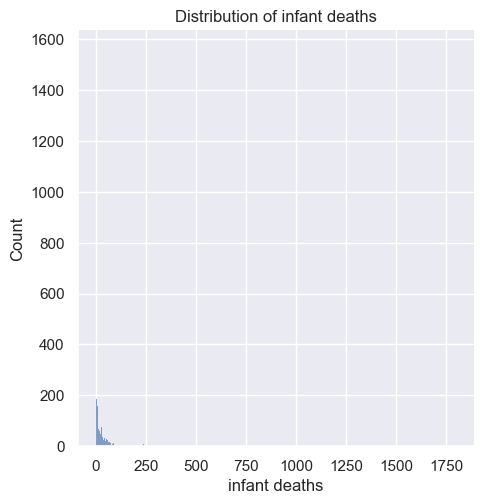

In [50]:
#Test whether infant deaths conform to a normal distribution
distribution_data(df['infant deaths'],"infant deaths")
kstesting_normality(df['infant deaths'],"infant deaths")

percentage expenditure p值为 0.0不是正态分布


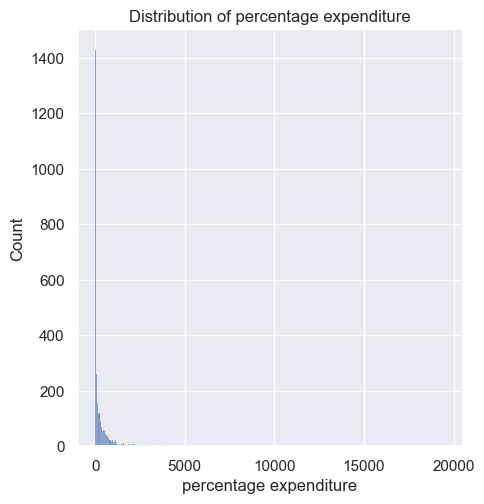

In [51]:
#Test whether the percentage expenditure conforms to the normal distribution
distribution_data(df['percentage expenditure'],"percentage expenditure")
kstesting_normality(df['percentage expenditure'],"percentage expenditure")

Measles  p值为 0.0不是正态分布


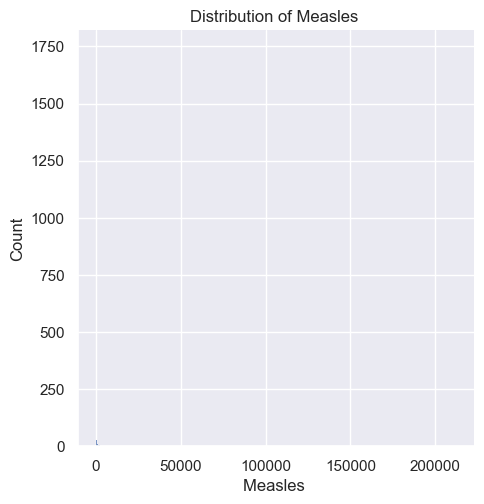

In [59]:
#Test whether Measles conforms to a normal distribution
distribution_data(df['Measles '],"Measles ")
kstesting_normality(df['Measles '],"Measles ")

 BMI  p值为 nan不是正态分布


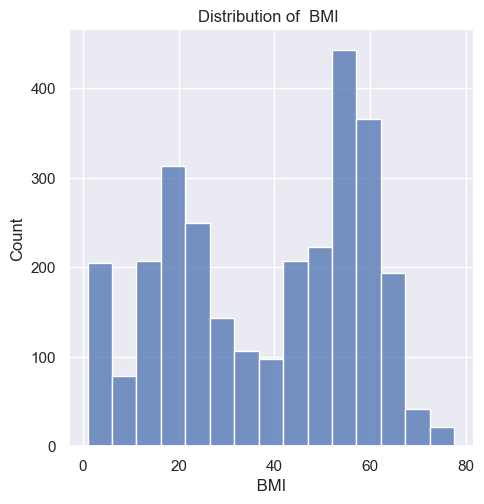

In [55]:
#Test whether BMI conforms to a normal distribution
distribution_data(df[' BMI ']," BMI ")
kstesting_normality(df[' BMI ']," BMI ")

under-five deaths  p值为 0.0不是正态分布


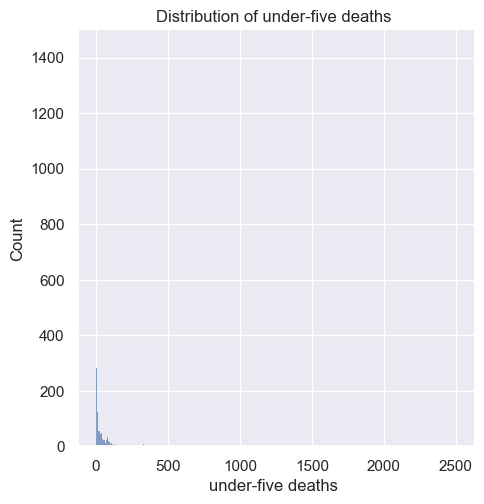

In [56]:
#Test whether under-five deaths fit the normal distribution
distribution_data(df['under-five deaths '],"under-five deaths ")
kstesting_normality(df['under-five deaths '],"under-five deaths ")

Polio p值为 nan不是正态分布


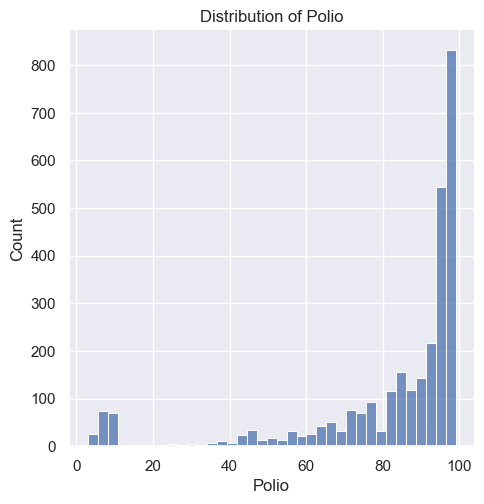

In [57]:
#Test whether Polio conforms to a normal distribution
distribution_data(df['Polio'],"Polio")
kstesting_normality(df['Polio'],"Polio")

Total expenditure p值为 nan不是正态分布


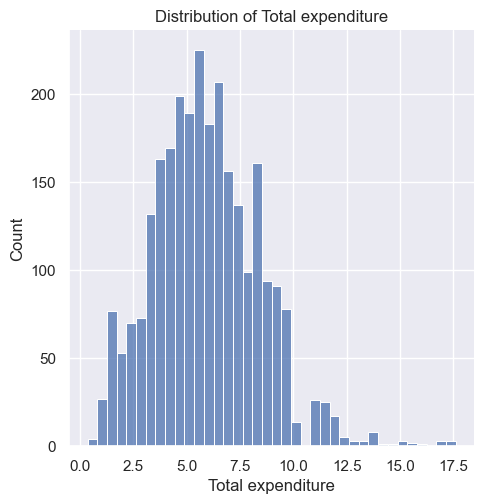

In [58]:
#Test whether Total expenditure conforms to the normal distribution
distribution_data(df['Total expenditure'],"Total expenditure")
kstesting_normality(df['Total expenditure'],"Total expenditure")

Diphtheria  p值为 nan不是正态分布


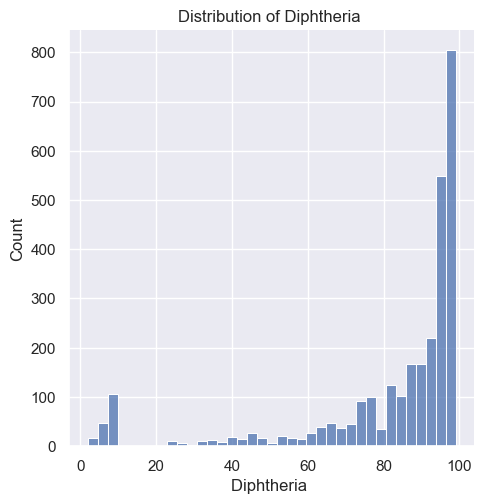

In [60]:
#Test whether Diphtheria conforms to a normal distribution
distribution_data(df['Diphtheria '],"Diphtheria ")
kstesting_normality(df['Diphtheria '],"Diphtheria ")

 HIV/AIDS p值为 0.0不是正态分布


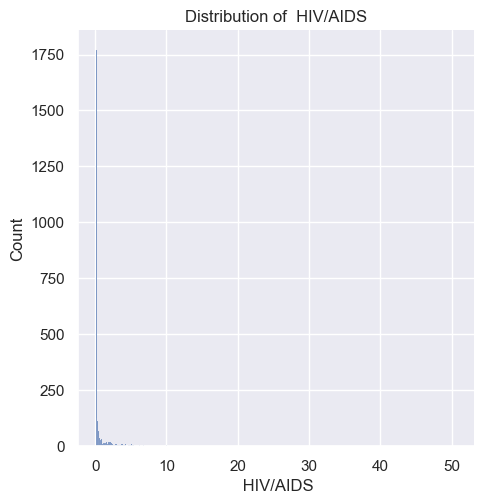

In [61]:
#Testing whether HIV/AIDS conforms to a normal distribution
distribution_data(df[' HIV/AIDS']," HIV/AIDS")
kstesting_normality(df[' HIV/AIDS']," HIV/AIDS")

GDP p值为 nan不是正态分布


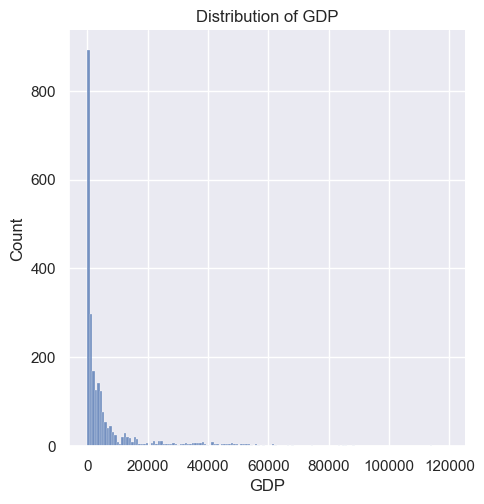

In [62]:
#Test whether GDP conforms to a normal distribution
distribution_data(df['GDP'],"GDP")
kstesting_normality(df['GDP'],"GDP")

Population p值为 nan不是正态分布


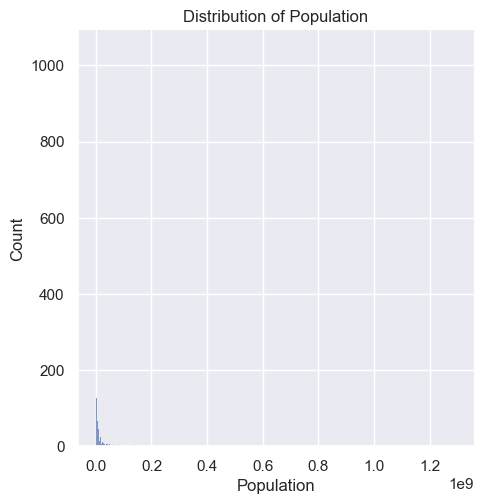

In [63]:
#Test whether Population conforms to a normal distribution
distribution_data(df['Population'],"Population")
kstesting_normality(df['Population'],"Population")

 thinness  1-19 years p值为 nan不是正态分布


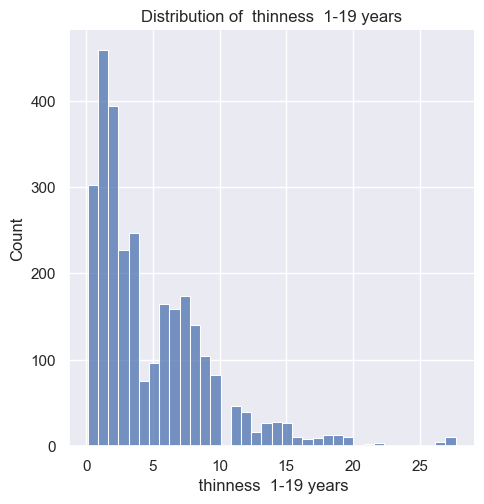

In [64]:
#Test for thinness 1-19 years for normal distribution
distribution_data(df[' thinness  1-19 years']," thinness  1-19 years")
kstesting_normality(df[' thinness  1-19 years']," thinness  1-19 years")

 thinness 5-9 years p值为 nan不是正态分布


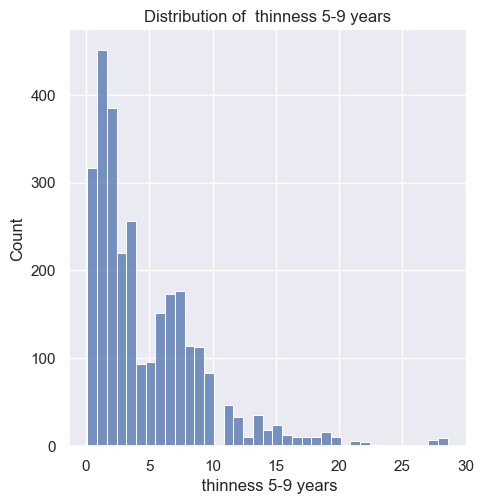

In [65]:
#Test for thinness 5-9 years for normal distribution
distribution_data(df[' thinness 5-9 years']," thinness 5-9 years")
kstesting_normality(df[' thinness 5-9 years']," thinness 5-9 years")

Income composition of resources p值为 nan不是正态分布


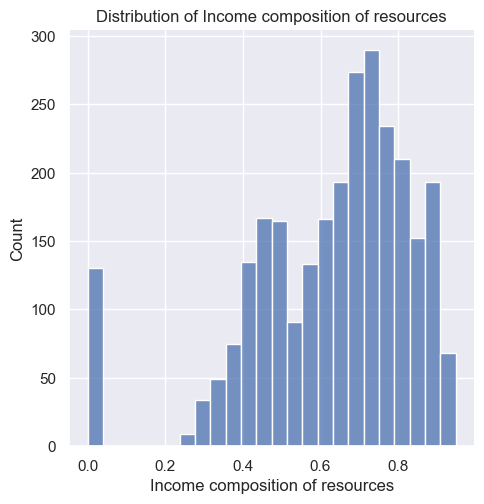

In [66]:
#Income composition of resources
distribution_data(df['Income composition of resources'],"Income composition of resources")
kstesting_normality(df['Income composition of resources'],"Income composition of resources")

Schooling p值为 nan不是正态分布


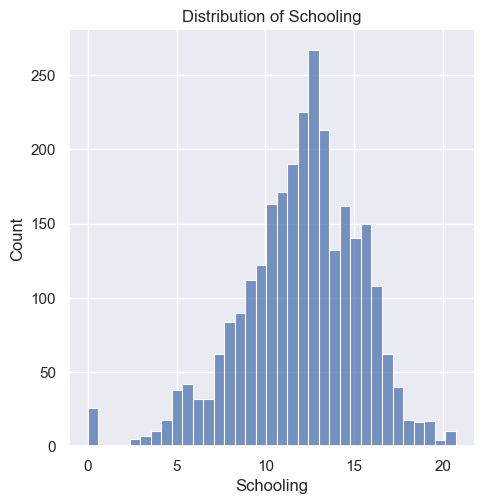

In [67]:
#Schooling
distribution_data(df['Schooling'],"Schooling")
kstesting_normality(df['Schooling'],"Schooling")

None of the above can be used because they have been verified as not normally distributed, but it can be seen that a few variables are Poisson distributed and this information may be useful when doing linear regression later.
The next step is to detect outliers using the box plot method (data interpolation detection)

In [40]:
def box_plot_drop(data_series):
    q_abnormal_low = data_series.quantile(0.25) - 1.5 * (data_series.quantile(0.75) - data_series.quantile(0.25))
    q_abnormal_up = data_series.quantile(0.75) + 1.5 * (data_series.quantile(0.75) - data_series.quantile(0.25))
    index = (data_series < q_abnormal_low) | (data_series > q_abnormal_up)

    data_series.loc[(data_series < q_abnormal_low) | (data_series > q_abnormal_up)] = np.nan
    outliers = data_series.loc[index]
    return data_series

    #sorted_data = sorted(data)
    #data_series = pd.Series(sorted_data)
    #outliers = box_plot(data_series)

def box_plot(data_series,indexout=[]):
    q_abnormal_low = data_series.quantile(0.25) - 1.5 * (data_series.quantile(0.75) - data_series.quantile(0.25))
    q_abnormal_up = data_series.quantile(0.75) + 1.5 * (data_series.quantile(0.75) - data_series.quantile(0.25))
    index = (data_series < q_abnormal_low) | (data_series > q_abnormal_up)
    outliers = data_series.loc[index]
    indexout.append(index)
    return outliers.tolist(),indexout
#因为用箱型图法来看alcohol列的离散值为空，所以假定其没有离群值
sorted_data = sorted(df["Alcohol"])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
print(outliers)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [93]:
sorted_data = sorted(df["Life expectancy "])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
box_plot_drop(data_series)
print(len(outliers))

12


In [74]:
#此数据为成年人死亡率太离谱了都已经超过一百了，所以不能用此数据
sorted_data = sorted(df["Adult Mortality"])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
print(outliers)
print(len(outliers))
#删除Adult Mortality列
df = df.drop('Adult Mortality', axis=1)

KeyError: 'Adult Mortality'

In [89]:
sorted_data = sorted(df["infant deaths"])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
print(len(outliers))
df = df.drop('infant deaths', axis=1)

301


In [75]:
#支出百分比也很离谱啊
sorted_data = sorted(df["percentage expenditure"])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
print(len(outliers))
#删除percentage expenditure的列
df = df.drop('percentage expenditure', axis=1)

KeyError: 'percentage expenditure'

In [76]:

sorted_data = sorted(df["Measles "])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
print(len(outliers))
#删除此列
df = df.drop('Measles ', axis=1)

509


In [47]:
sorted_data = sorted(df[" BMI "])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
print(len(outliers))

[]


In [77]:
sorted_data = sorted(df["under-five deaths "])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
print(len(outliers))
#删除此列
df = df.drop("under-five deaths ", axis=1)

386


In [78]:
sorted_data = sorted(df["Polio"])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
print(len(outliers))
#删除此列
df = df.drop("Polio", axis=1)

259


In [94]:
sorted_data = sorted(df["Total expenditure"])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
box_plot_drop(data_series)
print(len(outliers))

30


In [79]:
sorted_data = sorted(df["Diphtheria "])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)

print(len(outliers))
print(outliers)
#删除此列
df = df.drop("Diphtheria ", axis=1)

279
[2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 31.0, 35.0, 39.0, 42.0, 43.0, 46.0, 49.0, 3.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 19.0, 21.0, 23.0, 23.0, 23.0, 24.0, 24.0, 24.0, 25.0, 25.0, 25.0, 26.0, 26.0, 26.0, 27.0, 28.0, 28.0, 29.0, 29.0, 31.0, 31.0, 32.0, 33.0, 33.0, 33.0

In [80]:
sorted_data = sorted(df[" HIV/AIDS"])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
print(len(outliers))
df = df.drop(" HIV/AIDS", axis=1)

504


In [81]:
sorted_data = sorted(df["GDP"])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
print(len(outliers))
df = df.drop("GDP", axis=1)

347


In [65]:
sorted_data = sorted(df["GDP"])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
print(len(outliers))
print(outliers)

347
[14252.29452, 18477.57841, 19517.84168, 21673.7817, 21874.8195, 21955.149, 22242.68193, 22465.64184, 22527.31775, 22551.73574, 23465.38559, 23649.36661, 24253.2542, 24275.2426, 24489.73553, 24517.26745, 24913.24452, 24983.3792, 25916.29353, 26351.37568, 26834.2625, 26917.75898, 28827.32636, 29691.18158, 31997.2821, 32816.1688, 33228.69291, 33874.74255, 34879.72633, 36118.28381, 36544.5853, 36693.4262, 37636.11173, 38242.4252, 38969.17163, 41631.13141, 42554.1225, 42742.99898, 42955.24287, 45413.6571, 46511.6457, 46586.6525, 46657.629, 47654.18721, 48333.57273, 48799.8237, 49664.6854, 51126.74139, 51322.63997, 51386.37665, 51874.848, 58163.29359, 58487.451, 61191.19263, 61753.667, 62214.6912, 62245.129, 64322.6664, 67677.63477, 67792.3386, 14221.99259, 14223.86576, 15359.66971, 15384.8749, 15472.7814, 15534.1574, 15646.5591, 15846.47641, 16462.48556, 16523.32388, 17959.17854, 19356.67236, 23121.56635, 35589.71295, 36967.28292, 38852.3613, 47439.39684, 48424.58927, 16468.12886, 16846

In [82]:
sorted_data = sorted(df["Population"])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
print(len(outliers))
df = df.drop("Population", axis=1)

274


In [85]:
sorted_data = sorted(df[" thinness  1-19 years"])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
print(len(outliers))
df = df.drop(" thinness  1-19 years", axis=1)

KeyError: ' thinness  1-19 years'

In [86]:
sorted_data = sorted(df[" thinness 5-9 years"])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
print(len(outliers))
df = df.drop(" thinness 5-9 years", axis=1)

90


In [87]:
sorted_data = sorted(df["Income composition of resources"])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
print(len(outliers))
df = df.drop("Income composition of resources", axis=1)

119


In [95]:
sorted_data = sorted(df["Schooling"])
data_series=pd.Series(sorted_data)
outliers,index = box_plot(data_series)
box_plot_drop(data_series)
print(len(outliers))

40


In [91]:
df = df.drop("Status", axis=1)
print(df.head())

       Country  Year  Life expectancy   Alcohol   BMI   Total expenditure  \
0  Afghanistan  2015              65.0     0.01   19.1               8.16   
1  Afghanistan  2014              59.9     0.01   18.6               8.18   
2  Afghanistan  2013              59.9     0.01   18.1               8.13   
3  Afghanistan  2012              59.5     0.01   17.6               8.52   
4  Afghanistan  2011              59.2     0.01   17.2               7.87   

   Schooling  Status_int  
0       10.1           0  
1       10.0           0  
2        9.9           0  
3        9.8           0  
4        9.5           0  


In [92]:
df.to_csv("test.csv",index=False,sep=',')

In [96]:
print(df.head())

       Country  Year  Life expectancy   Alcohol   BMI   Total expenditure  \
0  Afghanistan  2015              65.0     0.01   19.1               8.16   
1  Afghanistan  2014              59.9     0.01   18.6               8.18   
2  Afghanistan  2013              59.9     0.01   18.1               8.13   
3  Afghanistan  2012              59.5     0.01   17.6               8.52   
4  Afghanistan  2011              59.2     0.01   17.2               7.87   

   Schooling  Status_int  
0       10.1           0  
1       10.0           0  
2        9.9           0  
3        9.8           0  
4        9.5           0  


In [102]:
df_a = df.dropna(how = 'any', axis = 0)
print(len(df_a))
df_a.to_csv("test3.csv",index=False,sep=',')

2563


Correlation, Pearson

In [108]:
import scipy.stats
print(scipy.stats.spearmanr(df_a["Life expectancy "],df_a["Alcohol"] )[0])
print(scipy.stats.spearmanr(df_a["Life expectancy "],df_a[" BMI "] )[0])
print(scipy.stats.spearmanr(df_a["Life expectancy "],df_a["Total expenditure"] )[0])
print(scipy.stats.spearmanr(df_a["Life expectancy "],df_a["Schooling"] )[0])
print("-----")
print(scipy.stats.spearmanr(df_a["Alcohol"],df_a[" BMI "] )[0])
print(scipy.stats.spearmanr(df_a["Alcohol"],df_a["Total expenditure"] )[0])
print(scipy.stats.spearmanr(df_a["Alcohol"],df_a["Schooling"] )[0])
print("----")
print(scipy.stats.spearmanr(df_a[" BMI "],df_a["Total expenditure"] )[0])
print(scipy.stats.spearmanr(df_a[" BMI "],df_a["Schooling"] )[0])
print("---")
print(scipy.stats.spearmanr(df_a["Total expenditure"],df_a["Schooling"] )[0])

0.4206390654250452
0.5845056938081002
0.2713341313277898
0.8074444124714744
-----
0.31752361536964196
0.33005514696726723
0.5500923032577314
----
0.2477471237360237
0.6196544744305931
---
0.2929693918570815


RFE(Recursive feature elimination method)

In [132]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#Recursive feature elimination method, returns data after feature selection
#The parameter estimator is the base model
#n_features_to_select is the number of features selected
feature_names = ["Alcohol", " BMI ", "Total expenditure","Schooling","Status_int"]
min_max_scaler1 = preprocessing.MinMaxScaler()
X_train_minmax1 = min_max_scaler1.fit_transform(df_a[feature_names])#特征归一化处理
model = LinearRegression()
rfe = RFE(model, n_features_to_select=4)
rfe.fit(X_train_minmax1,df_a["Life expectancy "].tolist())
# svc = SVC(kernel="linear")
# selector=RFE(estimator=svc, n_features_to_select=8)
# Xt=selector.fit_transform(X_train_minmax1,df_a["Life expectancy "])
print("N_features %s" % rfe.n_features_) # Number of features retained
print("Support is %s" % rfe.support_) # Whether to keep
print("Ranking %s" % rfe.ranking_) # Importance ranking
for i in zip(rfe.ranking_,feature_names,rfe.support_):
    print(i)

N_features 4
Support is [ True  True False  True  True]
Ranking [1 1 2 1 1]
(1, 'Alcohol', True)
(1, ' BMI ', True)
(2, 'Total expenditure', False)
(1, 'Schooling', True)
(1, 'Status_int', True)


Note: If the model is used for prediction only, the problem of multicollinearity may not be dealt with as long as the fit is good, and the presence of multicollinearity often does not affect the prediction results when the model is used for prediction

Dividing the training and test sets

In [133]:
from sklearn.model_selection import train_test_split
feature_names = ["Alcohol", " BMI ", "Total expenditure","Schooling","Status_int"]
# X为特征矩阵，y为目标变量
X_train, X_test, y_train, y_test = train_test_split(df_a[feature_names], df_a["Life expectancy "].tolist(), test_size=0.3, random_state=0)
print(X_test)

      Alcohol   BMI   Total expenditure  Schooling  Status_int
1044     8.25   46.5               6.15       15.8           0
1851     9.24   64.3              11.21       19.3           1
840      7.97   21.7               5.32        9.1           0
1280     2.53   58.7               7.61       15.1           0
1423     3.31   36.5               5.43       12.1           0
...       ...    ...                ...        ...         ...
265      6.48   44.4               4.40       12.3           0
179      1.70   61.5               4.37       14.5           0
1484     2.67   27.4               6.30       10.7           0
1517     0.01   55.3               3.46       15.9           0
2229     6.54   22.2              11.12        9.7           0

[769 rows x 5 columns]
